# Bayesian Linear Regression

### prior distribution of the variables of the model
$\alpha \sim N(0, 100)$
$\beta_i \sim N(0, 100)$
$\sigma \sim |N(0, 1)|$


In [1]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# %config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use('arviz-darkgrid')

In [3]:
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variables
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + rng.normal(size=size)*sigma

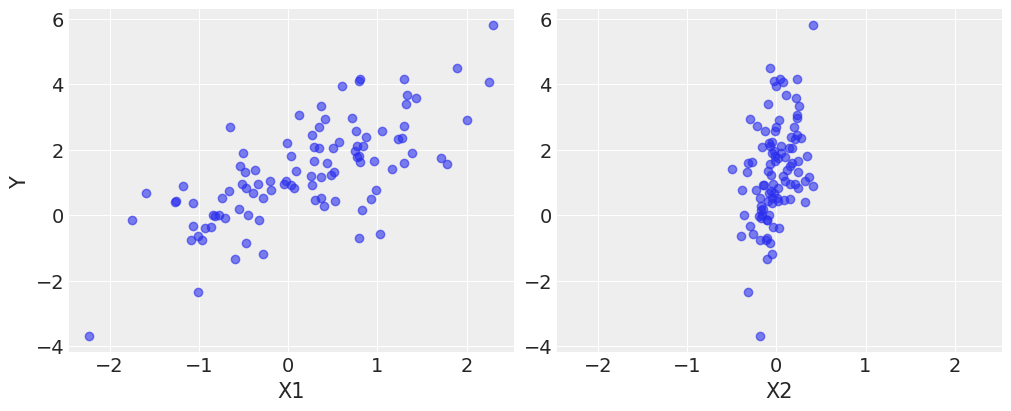

In [4]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2");


In [5]:
import pymc as pm

In [6]:
basic_model = pm.Model()

In [7]:
with basic_model:
    # prior belief about the value of the variables
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)
    
    mu = alpha + beta[0] * X1 +beta[1] * X2
    
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

In [8]:
with basic_model:
    idata =pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 20 seconds.


In [9]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

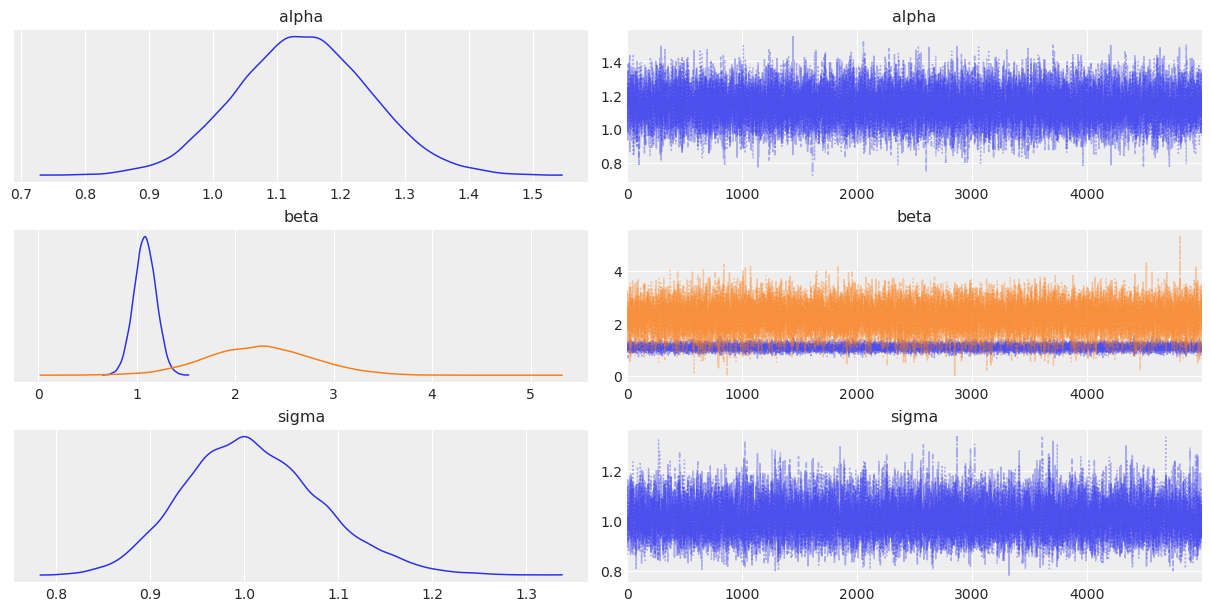

In [10]:
az.plot_trace(idata, combined=True)

In [11]:
az.summary(idata, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,1.14,0.10,0.95,1.34,0.0,0.0,27586.90,16755.21,1.0
beta[0],1.08,0.11,0.87,1.30,0.0,0.0,25019.81,16673.40,1.0
beta[1],2.25,0.54,1.26,3.30,0.0,0.0,25367.89,15895.63,1.0
sigma,1.01,0.07,0.88,1.15,0.0,0.0,28007.37,15848.24,1.0
